[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [home, book, brows, recommend, choic, award, g...
Name: stemmed_tokens, dtype: object
0    [home, book, browse, recommendation, choice, a...
Name: lemmatized_tokens, dtype: object


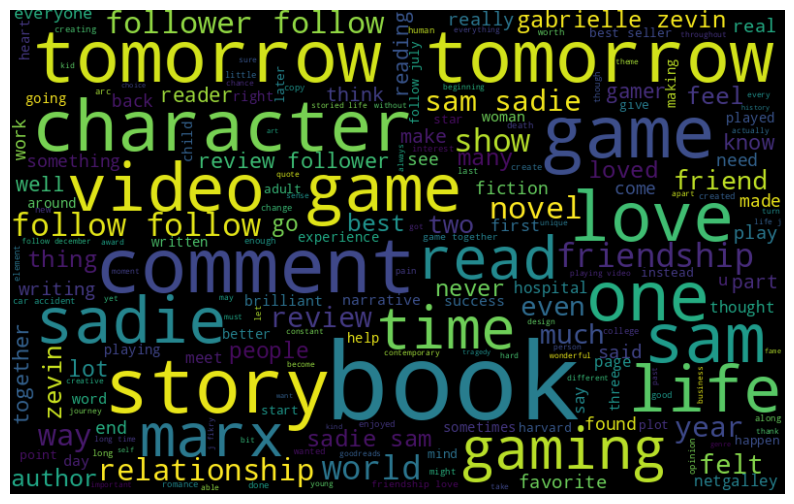

Bad pipe message: %s [b'\xdf<\xe2?\xd7\x94\xdc\xc1)L\xc3yD;)\xc3%{ \xbdJ\xa2f\xac\xc9\x17JM\x17c\x1d4\xa7\xa5\x8c\xfdb\x83\x87\xc8\x97=>\x90\xba\xe6\xcf\xa6\xf8=\xae\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$']
Bad pipe message: %s [b">}\x94y\xa7\x14\x0e[\x15\x1b\x85xB\xbb\xbd\x9d\xf6X\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0s\xc0w\x00\xc4\x00\xc3\xc0#\xc0'\x00g\x00@\xc0r\xc0v\x00\xbe\x00\xbd\xc0\n\xc0\x14\x009\x008\x00\x88\x00\x87\xc0\

In [3]:
import pandas as pd
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

data = pd.read_csv('/workspaces/codespaces-jupyter/data/Dataset_1.csv')

# Remove URLs
data['text'] = data['text'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove special characters
data['text'] = data['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]+', ' ', x))

# Convert text to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())

# Tokenize the text data
data['tokenized_text'] = data['text'].apply(lambda x: word_tokenize(x))

# Remove stopwords
stop_words = set(stopwords.words('english'))

data['filtered_tokens'] = data['tokenized_text'].apply(lambda x: [token for token in x if token not in stop_words])

stemmer = SnowballStemmer('english')

data['stemmed_tokens'] = data['filtered_tokens'].apply(lambda x: [stemmer.stem(token) for token in x])

# Display a sample of the stemmed data
print(data['stemmed_tokens'].sample(min(10, len(data)), replace=True))

lemmatizer = WordNetLemmatizer()

data['lemmatized_tokens'] = data['filtered_tokens'].apply(lambda x: [lemmatizer.lemmatize(token) for token in x])

# Display a sample of the lemmatized data
print(data['lemmatized_tokens'].sample(min(10, len(data)), replace=True))

all_words = ' '.join([word for tokens in data['lemmatized_tokens'] for word in tokens])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, stopwords=STOPWORDS).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

data.to_csv('/workspaces/codespaces-jupyter/data/Cleaned_Dataset_1.csv', index=False)